<a href="https://colab.research.google.com/github/lezya/Machine-Learning/blob/master/K_Nearest_Neighbors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
cmap = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])
from collections import Counter

(120, 4)
[5.1 2.5 3.  1.1]
(120,)
[1 2 0 2 1 0 0 0 0 1 0 1 0 2 2 0 2 2 2 2 0 2 2 1 1 1 1 1 1 0 0 2 2 2 0 0 0
 2 1 2 2 1 0 2 0 2 0 1 1 0 1 0 2 2 2 1 0 0 2 1 1 0 1 2 1 1 1 0 0 0 1 1 0 2
 1 2 2 1 0 1 2 0 0 2 2 1 1 2 0 1 2 2 2 1 0 0 0 0 2 1 2 0 0 1 1 2 1 1 2 2 2
 0 2 0 0 2 2 1 0 0]


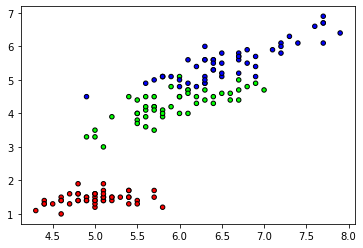

In [28]:
def accuracy(y_true, y_pred):
  accuracy = np.sum(y_true == y_pred)/len(y_true)
  return accuracy

iris = datasets.load_iris()
X, y = iris.data, iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

# Inspect data

print(X_train.shape)
print(X_train[0])

print(y_train.shape)
print(y_train)

plt.figure()
plt.scatter(X[:, 0], X[:, 2], c=y, cmap=cmap, edgecolor='k', s=20)
plt.show()



In [29]:
def euclidean_distance(x1, x2):
        return np.sqrt(np.sum((x1 - x2)**2))

In [34]:
class KNN:

  def __init__(self, k=3):
    self.k = k

  def fit(self, X,y):
    self.X_train = X
    self.y_train = y

  def predict(self, x):
    y_pred = [self._predict(x) for x in X]
    return np.array(y_pred)

  def _predict(self, x):
    #find the distance of new point x wrt all the points
    distances = [euclidean_distance(x,x_train) for x_train in self.X_train]
    #print(distances)
    #Sorting by distances to find the smallest 'k' distances
    k_idx = np.argsort(distances)[:self.k]        ##### np.argsort :: Returns the indices that would sort an array.
    #print(k_idx)
    #fetch the labels/location of the nearest k neighbors
    k_neighbor_labels = [self.y_train[i] for i in k_idx]
    #return the most common class label
    most_common = Counter(k_neighbor_labels).most_common(1)    #most common element, the integer which is passed(most_common(1)) 
    #returns only the most common element, if we pass nothing then it will return a list of tuples with all the elements and their ocurances, see below example
    return most_common[0][0] 

In [39]:
k = 3
clf = KNN(k=k)
clf.fit(X_train, y_train)
predictions = clf._predict(X_test)
print("custom KNN classification accuracy", accuracy(y_test, predictions))

custom KNN classification accuracy 0.43333333333333335


In [38]:
a = [1,1,2,2,4,5,8,9,6,2]
print(Counter(a).most_common(1))

[(2, 3)]
